In [2]:
import numpy as np
import h5py as h5
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
#from mayavi import mlab
%matplotlib inline

In [16]:
particle_IDs = np.loadtxt("haloIDs.dat")
f = h5.File('lcdm_snap000_cdm.h5')
print(list(f.keys()) )
data = f['data']
print(np.shape(data))
print(data[1]['positionX'] )
print(data[1] )
data[1000]['ID']
type(f)
print(np.shape(particle_IDs)[0])

[u'data', u'localBoxOffset', u'localBoxSize', u'numParts', u'part_info']
(134217728,)
0.000502723667085
(1, 0.0005027236670845825, 0.0008735333416650366, 0.0030158320688094273, -2.7012547580926843e-06, -6.166840029053425e-07, 5.067321082093021e-07)
10017


In [32]:
#all particles have their mass set to: 2.32492e-09
#Omega_m0 = 0.312046
10017*2.32492e-09

2.3288723639999998e-05

In [26]:
i=0
x=np.zeros(np.shape(particle_IDs)[0])
y=np.zeros(np.shape(particle_IDs)[0])
z=np.zeros(np.shape(particle_IDs)[0])
for ID in particle_IDs:
    x[i]= data[ID]['positionX']
    y[i]= data[ID]['positionY']
    z[i]= data[ID]['positionZ']
    i+=1

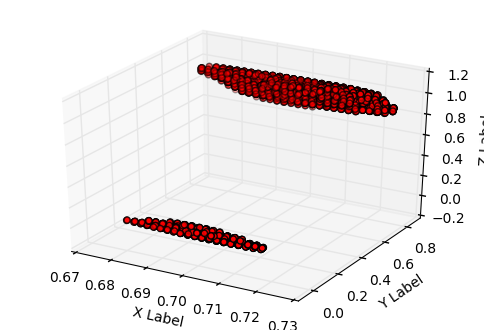

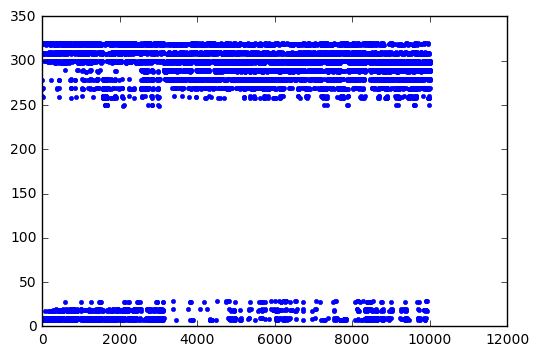

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.savefig('particles.pdf')
plt.show()


plt.plot(z*320,'.')
plt.savefig('zcoord.pdf')
plt.show()


In [ ]:
#[('ID', '>i8'), ('positionX', '<f8'), ('positionY', '<f8'), 
#('positionZ', '<f8'), ('velocityX', '<f8'), ('velocityY', '<f8'), 
#('velocityZ', '<f8')]



#data[2][1]
#data = data[:,:,:]
N=np.shape(data)[0]
IDs = []
data[85]['positionX']
# data
# list(f)
#plt.imshow(data[:,:])
#print(data[:100]['positionX'])
for i in range(N):
    e = data[i]
    distance =( ( e['positionX']*320. -222.408295 )**2 + (e['positionY']*320. - 255.214981)**2 +
               (e['positionZ']*320. -317.707397)**2 
              )
    distance = np.sqrt(distance)
    virial_radius = 1.20383227 #converted to Mpc
    if(distance <= virial_radius):
        IDs.append(e['ID'])
    if(i%1000000==0):
        print("index "+str(i)+" found number of particles: "+str(len(IDs)))
    del(e)

In [ ]:
for i in range(N):
    distance =( ( data[i]['positionX'] -222.408295 )**2 + (data[i]['positionY'] - 255.214981)**2 +
               (data[i]['positionY']-317.707397)**2 
              )
    distance = np.sqrt(distance)
    virial_radius = 1.20383227e+03
    if(distance < virial_radius):
        IDs[i,0] = data[i]['ID']
        IDs[i,1] = data[i]['positionX']
        IDs[i,2] = data[i]['positionY']
        IDs[i,3] = data[i]['positionZ']

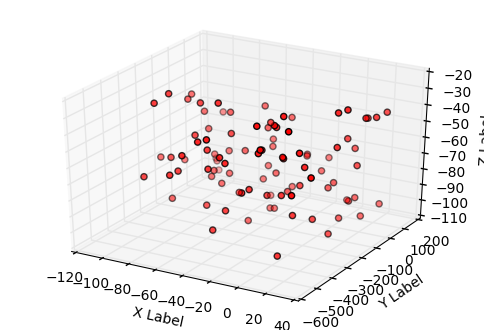

In [24]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = randrange(n, -100, 32)
ys = randrange(n, -500, 100)
zs = randrange(n, -100, -25)
ax.scatter(xs, ys, zs, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
# , ('b', '^', -30, -5)